In [85]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [86]:
gal_file = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM4/qpm_galaxies.xyzwj')

In [87]:
rand_file = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM4/qpm_randoms_10x.xyzwj')

KeyboardInterrupt: 

In [ ]:
sum_gal_weights = np.sum(gal_file[:,3])
sum_rand_weights = np.sum(rand_file[:,3])

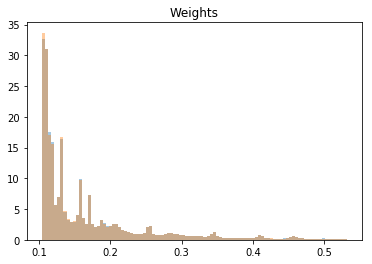

In [15]:
plt.hist(gal_file[:,3],density=True,alpha=0.4,bins=100)
plt.hist(rand_file[:,3],density=True,alpha=0.4,bins=100);
plt.title("Weights");

In [34]:
jacks = np.unique(rand_file[:,4])

In [40]:
gal_jack_weights = np.zeros(len(jacks))
rand_jack_weights = np.zeros(len(jacks))
for i in range(169):
    ind = np.where(gal_file[:,4]==jacks[i])
    gal_jack_weights[i] = np.sum(gal_file[ind,3])
    ind = np.where(rand_file[:,4]==jacks[i])
    rand_jack_weights[i] = np.sum(rand_file[ind,3])

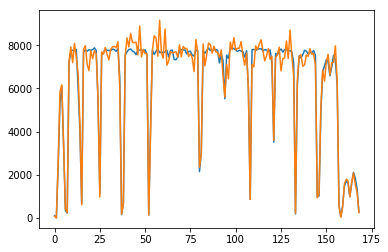

In [43]:
plt.plot(rand_jack_weights)
plt.plot(gal_jack_weights*sum_rand_weights/sum_gal_weights)

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


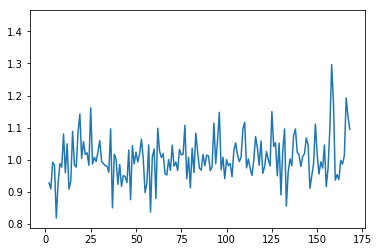

In [45]:
plt.plot(rand_jack_weights/gal_jack_weights*sum_gal_weights/sum_rand_weights)

In [76]:
jackknife_file = '/mnt/store1/oliverphilcox/Mock1QPM4/xi_jack/xi_jack_n35_m10_j169_11.dat'
weight_file = '/mnt/store1/oliverphilcox/Mock1QPM4/weights/jackknife_weights_n35_m10_j169_11.dat'
xi_true_file = '/mnt/store1/oliverphilcox/Mock1QPM4/xi/xi_n35_m10_11.dat'
xi_jack = np.loadtxt(jackknife_file,skiprows=2)
xi_true = np.loadtxt(xi_true_file,skiprows=2)
weights = np.loadtxt(weight_file)[:,1:]

In [77]:
w_xi = np.multiply(weights,xi_jack)
simple_xi_tot = np.sum(w_xi,axis=0)

In [78]:
weighted_xi_tot = np.zeros(w_xi.shape)
for i in range(len(jacks)):
    weighted_xi_tot[i] = w_xi[i,:]*gal_jack_weights[i]/rand_jack_weights[i]*sum_rand_weights/sum_gal_weights
weighted_xi_tot = np.sum(weighted_xi_tot,axis=0)

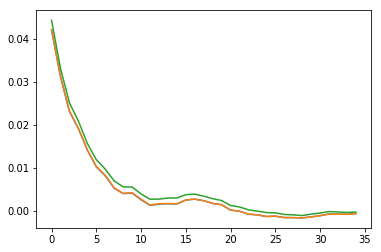

In [88]:
plt.plot(simple_xi_tot.reshape(35,10).mean(axis=1))
plt.plot(weighted_xi_tot.reshape(35,10).mean(axis=1))
plt.plot(xi_true.mean(axis=1))

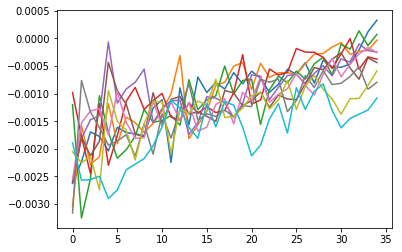

In [93]:
plt.plot(simple_xi_tot.reshape(35,10)-xi_true)
#plt.plot(xi_true)

## Look at small N-gal test case

In [265]:
rand_file = np.loadtxt('/mnt/store1/oliverphilcox/Mock1QPM4/small/randoms_10x.xyzwj')
rand_file50 = np.loadtxt('/mnt/store1/oliverphilcox/Mock1QPM4/small/randoms_50x.xyzwj')
gal_file = np.loadtxt('/mnt/store1/oliverphilcox/Mock1QPM4/small/galaxies.xyzwj')

In [295]:
sum_rand_w=np.sum(rand_file[:,3])
sum_gal_w = np.sum(gal_file[:,3])
sum_rand50_w = np.sum(rand_file50[:,3])

In [296]:
jacks = np.unique(rand_file[:,4])

In [174]:
gal_jack_weights = np.zeros(len(jacks))
rand_jack_weights = np.zeros(len(jacks))
for i in range(168):
    ind = np.where(gal_file[:,4]==jacks[i])
    gal_jack_weights[i] = np.sum(gal_file[ind,3])
    ind = np.where(rand_file[:,4]==jacks[i])
    rand_jack_weights[i] = np.sum(rand_file[ind,3])

In [299]:
xi_file = np.load('/mnt/store1/oliverphilcox/Mock1QPM4/small/test_full_xi.npz')
xi_jack_file = np.load('/mnt/store1/oliverphilcox/Mock1QPM4/small/test_jack_xi.npz')

In [300]:
xi=xi_file['xi']
xi_jack=xi_jack_file['xi_jack']

In [301]:
DDa=xi_file['DD']
DDaA=xi_jack_file['DD']
DRa=xi_file['DR']
DRaA=xi_jack_file['DR']
RRaA = xi_jack_file['RR']
RRa=xi_file['RR']
weights = RRaA/np.sum(RRaA,axis=0)

In [306]:
np.isnan(xi_jack).sum()

48

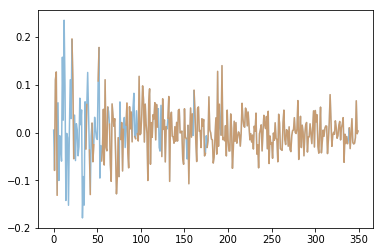

In [302]:
plt.plot(xi.reshape(-1,1),alpha=0.5)
plt.plot(np.sum(xi_jack*weights,axis=0),alpha=0.5)

In [284]:
xi_jack

array([[-1.1119838 , -0.65866609,  0.83088418, ...,  0.14150778,
        -0.25250997,  0.06812345],
       [-0.64999432, -0.25588973, -0.33166907, ..., -0.06890382,
        -0.32363736, -0.4000855 ],
       [ 0.06552   ,  0.04632916,  0.20713108, ...,  0.02094545,
         0.06346034,  0.08383624],
       ...,
       [-0.2455175 , -0.57273216, -0.61425571, ...,  0.15602895,
         0.05970916,  0.17588075],
       [ 0.63317   ,  0.0560118 ,  0.33959636, ...,  0.09500362,
         0.04536894,  0.20913758],
       [-2.05366075, -0.54280434,  0.88081696, ..., -0.06313212,
         0.03838122,  0.25890554]])

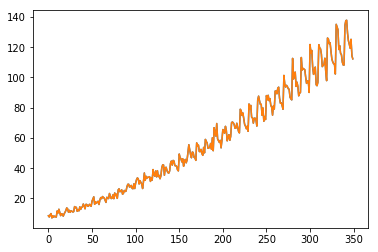

In [223]:
plt.plot(DDa)
plt.plot(np.sum(DDaA,axis=0))

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


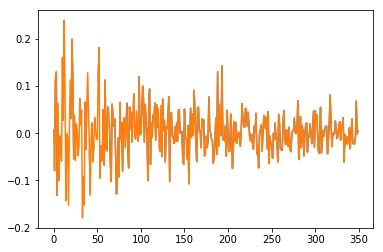

In [276]:
xi_aA = DDaA/RRaA*len(rand_file)**2./len(gal_file)**2.-2.*DRaA/RRaA*(len(rand_file)**2./(len(gal_file)*len(rand_file50)))+1.
xi_aJ=np.sum(xi_aA*weights,axis=0);
plt.plot(xi_aJ)
xi_a = DDa/RRa*(len(rand_file)/len(gal_file))**2.-2.*DRa/RRa*(len(rand_file)**2./(len(rand_file50)*len(gal_file)))+1.
plt.plot(xi_a)

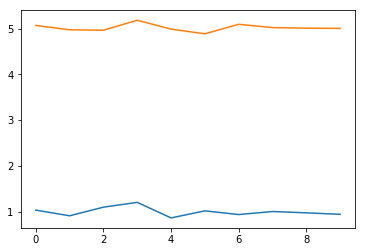

In [277]:
plt.plot((DDa/RRa)[:10]*len(rand_file)**2./len(gal_file)**2.)
plt.plot((DRa/RRa)[:10]*len(rand_file)/len(gal_file))

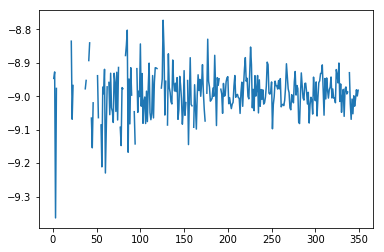

In [242]:
plt.plot(xi_a-xi_aJ)

## should we be using LS estimator for $\xi^J$ when we don't in the code?

In [317]:
xi_file = np.load('/mnt/store1/oliverphilcox/Mock1QPM4/test_full_xi.npz')
xi_jack_file = np.load('/mnt/store1/oliverphilcox/Mock1QPM4/test_jack_xi.npz')
weights = xi_jack_file['RR']/np.sum(xi_jack_file['RR'],axis=0)

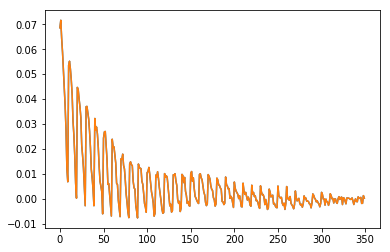

In [320]:
plt.plot(xi_file['xi'].reshape(-1,1))
plt.plot(np.sum(xi_jack_file['xi_jack']*weights,axis=0));

In [356]:
RR=xi_file['RR']
DD=xi_file['DD']
RRaA=xi_jack_file['RR']
DRaA=xi_jack_file['DR']
DDaA=xi_jack_file['DD']

In [360]:
jack_xi = DDaA/RRaA-1.
weighted_xi = weights*jack_xi
weighted_xi_LS = weights*xi_jack_file['xi_jack']
jack_cov = np.matmul(weighted_xi.T,weighted_xi)
jack_cov_LS = np.matmul(weighted_xi_LS.T,weighted_xi_LS)
jack_cov/= np.ones_like(jack_cov)-np.matmul(weights.T,weights)
jack_cov_LS/=np.ones_like(jack_cov_LS)-np.matmul(weights.T,weights)

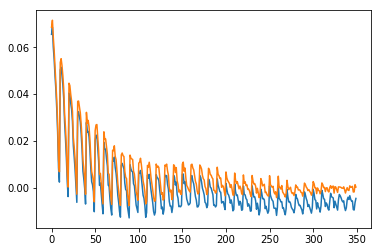

In [361]:
plt.plot(np.sum(weighted_xi,axis=0))
plt.plot(np.sum(weighted_xi_LS,axis=0))

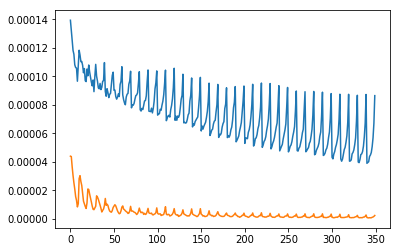

In [362]:
plt.plot(np.diag(jack_cov))
plt.plot(np.diag(jack_cov_LS))

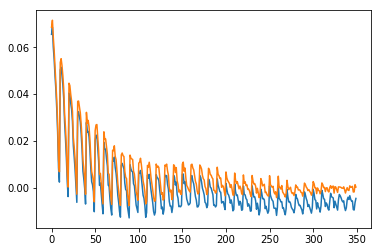

In [329]:
plt.plot(np.sum(DDaA/RRaA*weights,axis=0)-1.);
plt.plot(xi_file['xi'].reshape(-1,1))